##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [1]:
!pip install -q tflite-model-maker --user

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\butch\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\butch\\AppData\\Local\\Temp\\pip-install-xzcbwcz6\\pycocotools_dba0a581bcaa44d8bb6ade221eebb045\\setup.py'"'"'; __file__='"'"'C:\\Users\\butch\\AppData\\Local\\Temp\\pip-install-xzcbwcz6\\pycocotools_dba0a581bcaa44d8bb6ade221eebb045\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\butch\AppData\Local\Temp\pip-wheel-ny14alks'
       cwd: C:\Users\butch\AppData\Local\Temp\pip-install-xzcbwcz6\pycocotools_dba0a581bcaa44d8bb6ade221eebb045\
  Complete output (23 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64

Import the required packages.

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tflite_model_maker'

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [4]:
# image_path = tf.keras.utils.get_file(
#       'flower_photos.tgz',
#       'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#       extract=True)
image_path = os.path.join('D:/Human Activity Recognition/', 'flower_photos')

228818944/228813984 [==============================] - 4s 0us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in GitHub.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [5]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Step 2. Customize the TensorFlow model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , models
import os
import cv2
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
MainPath = 'D:/Human Activity Recognition/Stanford40/'
selected = ['smoking' , 'running']
def LoadData(path,size=224) :
    lst = {}
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    NewPath = path + 'JPEGImages/'
    for i in os.listdir(path+'/ImageSplits') :
        for j in selected :
            if j in i :
                if 'train' in i :
                    data = open(path+'/ImageSplits'+'/'+i,'r')
                    for img_path in data.readlines() :
                        lst[img_path[:-1]] = [0,selected.index(j)]
                else :
                    data = open(path+'/ImageSplits'+'/'+i,'r')
                    for img_path in data.readlines() :
                        lst[img_path[:-1]] = [1,selected.index(j)]
    #print(lst)
    New_Path = path + 'XMLAnnotations/'
    for i in lst :
        if lst[i][0] :
            img = cv2.imread(NewPath + i)
            da = BeautifulSoup(open(New_Path+i[:-3]+'xml','r').read(),'xml')
            xmax,xmin,ymax,ymin = da.find_all('xmax') , da.find_all('xmin') , da.find_all('ymax'), da.find_all('ymin')
            for a,b,c,d in zip(xmax,xmin,ymax,ymin) :
                X_train.append(cv2.resize(img[int(d.text):int(c.text),int(b.text):int(a.text)],(size,size)))
                Y_train.append(lst[i][1])
        else :
            img = cv2.imread(NewPath + i)
            da = BeautifulSoup(open(New_Path+i[:-3]+'xml','r').read(),'xml')
            xmax,xmin,ymax,ymin = da.find_all('xmax') , da.find_all('xmin') , da.find_all('ymax'), da.find_all('ymin')
            for a,b,c,d in zip(xmax,xmin,ymax,ymin) :
                X_test.append(cv2.resize(img[int(d.text):int(c.text),int(b.text):int(a.text)],(size,size)))
                Y_test.append(lst[i][1])
    X_train , Y_train , X_test , Y_test = np.array(X_train) , np.array(Y_train) , np.array(X_test) , np.array(Y_test)
    return X_train , Y_train , X_test , Y_test
X_train , Y_train , X_test , Y_test = LoadData(MainPath)
train_data= (X_train,Y_train)

In [6]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
103/103 [==============================] - 15s 32ms/step - loss: 1.0672 - accuracy: 0.6416
Epoch 2/5
103/103 [==============================] - 3s 33ms/step - loss: 0.6787 - accuracy: 0.8805
Epoch 3/5
103/103 [==============================] - 3s 32ms/step - loss: 0.6351 - accuracy: 0.9090
Epoch 4/5
103/103 [======

Step 3. Evaluate the model.

In [7]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 2s 40ms/step - loss: 0.6094 - accuracy: 0.9074


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata.

You could download it in the left sidebar same as the uploading part for your own use.

In [8]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmppwh7ok4n/assets


INFO:tensorflow:Assets written to: /tmp/tmppwh7ok4n/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpw5ekmf9v/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpw5ekmf9v/labels.txt.


After these simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

### Step 1: Load Input Data Specific to an On-device ML App

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

The dataset has the following directory structure:

<pre>
<b>flower_photos</b>
|__ <b>daisy</b>
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ <b>dandelion</b>
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ <b>roses</b>
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ <b>sunflowers</b>
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ <b>tulips</b>
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
</pre>

In [9]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

Use `ImageClassifierDataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [10]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [11]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

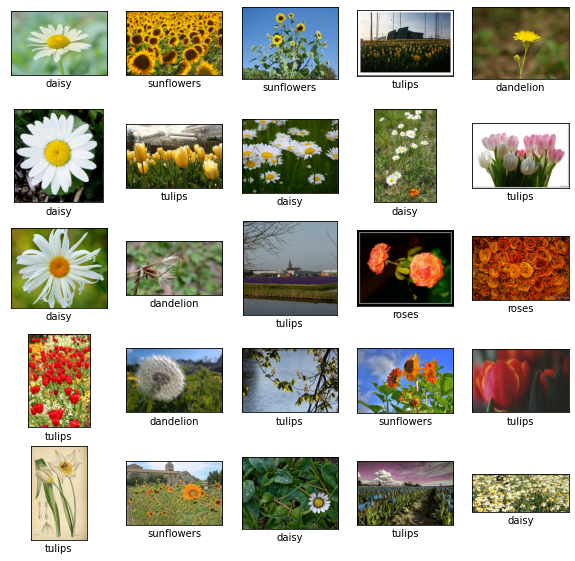

In [12]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [13]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 6s 55ms/step - loss: 1.1280 - accuracy: 0.5996 - val_loss: 0.6487 - val_accuracy: 0.8920
Epoch 2/5
91/91 [==============================] - 4s 48ms/step - loss: 0.6715 - accuracy: 0.8973 - val_loss: 0.6143 - val_accuracy: 0.9205
Epoch 3/5
91/91 [==============================] - 5s 50ms/step - loss: 0.6233 - accu

Have a look at the detailed model structure.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [15]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 1s 30ms/step - loss: 0.6395 - accuracy: 0.8992


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

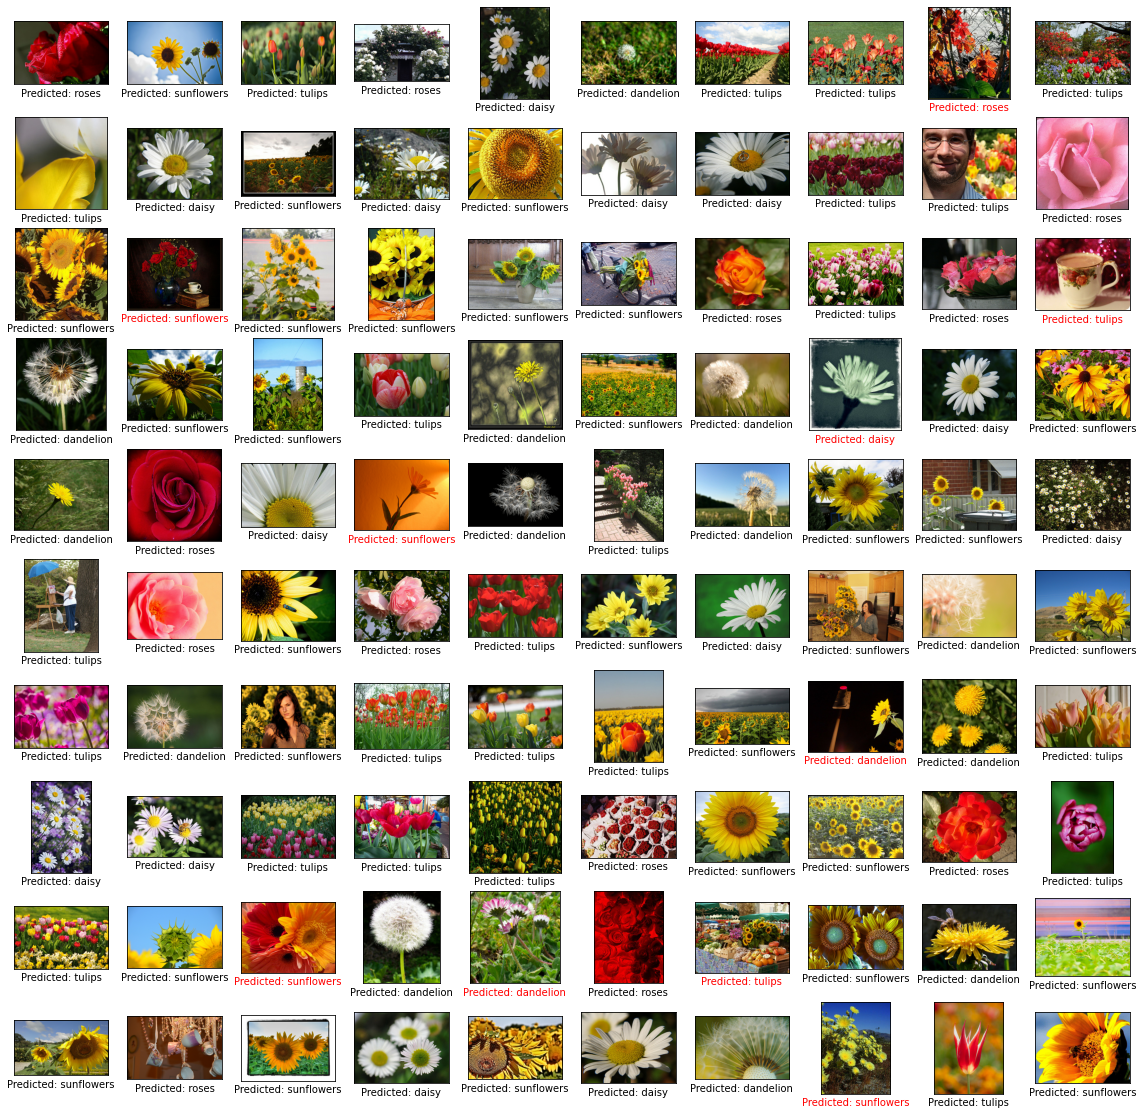

In [16]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the existing model to TensorFlow Lite model format with  [metadata](https://www.tensorflow.org/lite/convert/metadata). The default TFLite filename is `model.tflite`.

In [17]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp3t_6llys/assets


INFO:tensorflow:Assets written to: /tmp/tmp3t_6llys/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp1sjzsixa/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp1sjzsixa/labels.txt.


See [example applications and guides of image classification](https://www.tensorflow.org/lite/models/image_classification/overview#example_applications_and_guides) for more details about how to integrate the TensorFlow Lite model into mobile apps.

The allowed export formats can be one or a list of the following:

*   `ExportFormat.TFLITE`
*   `ExportFormat.LABEL`
*   `ExportFormat.SAVED_MODEL`

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

In [18]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [19]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.22745098 0.23529412 0.15294118]
   [0.22577031 0.23361345 0.15126051]
   [0.22352941 0.23137255 0.14901961]
   ...
   [0.19887958 0.00112041 0.        ]
   [0.1927172  0.         0.        ]
   [0.16134429 0.00224095 0.        ]]

  [[0.223722   0.23156513 0.1492122 ]
   [0.22363946 0.2314826  0.14912966]
   [0.22352941 0.23137255 0.14901961]
   ...
   [0.2015432  0.00378401 0.        ]
   [0.1927172  0.         0.        ]
   [0.16134429 0.00224095 0.        ]]

  [[0.22352941 0.23137255 0.14901961]
   [0.22352941 0.23137255 0.14901961]
   [0.22656062 0.23440376 0.15205082]
   ...
   [0.20875359 0.00139553 0.        ]
   [0.19625361 0.00050519 0.        ]
   [0.16285984 0.00375651 0.        ]]

  ...

  [[0.25490198 0.2627451  0.20784314]
   [0.25490198 0.2627451  0.20784314]
   [0.25490198 0.2627451  0.20784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.22745098 0.23529412 0.15294118]
   [0.22577031 0.23361345 0.15126051]
   [0.22352941 0.23137255 0.14901961]
   ...
   [0.19887958 0.00112041 0.        ]
   [0.1927172  0.         0.        ]
   [0.16134429 0.00224095 0.        ]]

  [[0.223722   0.23156513 0.1492122 ]
   [0.22363946 0.2314826  0.14912966]
   [0.22352941 0.23137255 0.14901961]
   ...
   [0.2015432  0.00378401 0.        ]
   [0.1927172  0.         0.        ]
   [0.16134429 0.00224095 0.        ]]

  [[0.22352941 0.23137255 0.14901961]
   [0.22352941 0.23137255 0.14901961]
   [0.22656062 0.23440376 0.15205082]
   ...
   [0.20875359 0.00139553 0.        ]
   [0.19625361 0.00050519 0.        ]
   [0.16285984 0.00375651 0.        ]]

  ...

  [[0.25490198 0.2627451  0.20784314]
   [0.25490198 0.2627451  0.20784314]
   [0.25490198 0.2627451  0.20784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.

{'accuracy': 0.8991825613079019}

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create` function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator latency, with little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker supports multiple post-training quantization options. Let's take full integer quantization as an instance. First, define the quantization config to enforce full integer quantization for all ops including the input and output. The input type and output type are `uint8` by default. You may also change them to other types like `int8` by setting `inference_input_type` and `inference_output_type` in config.

In [20]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

Then we export TensorFlow Lite model with such configuration.

In [21]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp70czhqy4/assets


INFO:tensorflow:Assets written to: /tmp/tmp70czhqy4/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpefl35ntl/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpefl35ntl/labels.txt.


In Colab, you can download the model named `model_quant.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to  `mobilenet_v2_spec` in `create` method.

In [22]:
model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 8s 57ms/step - loss: 1.1140 - accuracy: 0.6539 - val_loss: 0.7140 - val_accuracy: 0.8778
Epoch 2/5
91/91 [==============================] - 5s 50ms/step - loss: 0.7009 - accuracy: 0.8800 - val_loss: 0.6768 - val_accuracy: 0.8778
Epoch 3/5
91/91 [==============================] - 5s 52ms/step - loss: 0.6552 - accu

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [23]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 1s 36ms/step - loss: 0.6648 - accuracy: 0.8883


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of `ImageModelSpec` and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [24]:
inception_v3_spec = model_spec.ImageModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ImageModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.


In [25]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
91/91 [==============================] - 6s 53ms/step - loss: 1.1106 - accuracy: 0.6262 - val_loss: 0.6414 - val_accuracy: 0.9091
Epoch 2/10
91/91 [==============================] - 4s 49ms/step - loss: 0.6646 - accuracy: 0.8989 - val_loss: 0.6097 - val_accuracy: 0.9233
Epoch 3/10
91/91 [==============================] - 5s 50ms/step - loss: 0.6303 - a

Evaluate the newly retrained model with 10 training epochs.

In [26]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 1s 29ms/step - loss: 0.6252 - accuracy: 0.9101
